# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [78]:
import pandas as pd
import numpy as np

In [79]:
df = pd.read_csv('crx.data',header=None)

In [80]:
# validating number of obsv

In [81]:
df.shape

(690, 16)

In [82]:
# check missing vals

In [83]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [84]:
# we can see the values are not na but rather ?
df[0].value_counts()

b    468
a    210
?     12
Name: 0, dtype: int64

In [85]:
df = df.replace('?',np.nan)

In [86]:
df.isna().sum()

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

In [87]:
# lets drop the na's

In [88]:
df = df.dropna()

In [89]:
# let's replace col 15 with 0, 1 instead of +/-

In [90]:
df[15] = df.loc[:][15].replace('+',1).replace('-',0)

In [91]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


In [92]:
#checking class types: looks like series 1 and 13 need to change to float
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
0     653 non-null object
1     653 non-null object
2     653 non-null float64
3     653 non-null object
4     653 non-null object
5     653 non-null object
6     653 non-null object
7     653 non-null float64
8     653 non-null object
9     653 non-null object
10    653 non-null int64
11    653 non-null object
12    653 non-null object
13    653 non-null object
14    653 non-null int64
15    653 non-null int64
dtypes: float64(2), int64(3), object(11)
memory usage: 86.7+ KB


In [93]:
df[1] = pd.to_numeric(df[1])
df[13] = pd.to_numeric(df[13])

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
0     653 non-null object
1     653 non-null float64
2     653 non-null float64
3     653 non-null object
4     653 non-null object
5     653 non-null object
6     653 non-null object
7     653 non-null float64
8     653 non-null object
9     653 non-null object
10    653 non-null int64
11    653 non-null object
12    653 non-null object
13    653 non-null int64
14    653 non-null int64
15    653 non-null int64
dtypes: float64(3), int64(4), object(9)
memory usage: 86.7+ KB


In [0]:
# TODO

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [95]:
# lets take a look at relationships

In [191]:
import seaborn as sns
import scipy.stats as stats
from math import sqrt
import statsmodels.stats.api as sms

In [96]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1


In [99]:
#looks like series 10 is highly correlated with passing credit score and series 13 is negatively correlated 
df.corr()

,1,2,7,10,13,14,15
1,1.000000,0.217681,0.417647,0.198153,-0.084618,0.029078,0.180252
2,0.217681,1.000000,0.300600,0.269834,-0.217076,0.119754,0.207086
7,0.417647,0.300600,1.000000,0.327325,-0.064781,0.052159,0.332728
10,0.198153,0.269834,0.327325,1.000000,-0.116101,0.058408,0.406052
13,-0.084618,-0.217076,-0.064781,-0.116101,1.000000,0.073384,-0.085217
14,0.029078,0.119754,0.052159,0.058408,0.073384,1.000000,0.172766
15,0.180252,0.207086,0.332728,0.406052,-0.085217,0.172766,1.000000


In [103]:
# let's check out how features relate to sub groups

In [101]:
df_fail = df.loc[df[15] == 0]
df_pass = df.loc[df[15] == 1]

In [108]:
df_fail.describe() - df_pass.describe()

,1,2,7,10,13,14,15
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.0
mean,-4.283204,-2.089618,-2.251460,-4.049550,28.787342,-1821.751561,-1.0
std,-1.970189,-1.099572,-2.138127,-4.439768,9.514403,-7028.167457,0.0
min,1.420000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0
25%,-1.330000,-0.665000,-0.625000,0.000000,100.000000,0.000000,-1.0
50%,-4.120000,-2.270000,-1.545000,-3.000000,40.000000,-209.500000,-1.0
75%,-6.610000,-4.561250,-3.500000,-7.000000,-20.000000,-1149.500000,-1.0
max,-1.920000,-1.665000,-14.625000,-47.000000,1160.000000,-94448.000000,-1.0


In [164]:
# let's define the confidence interval function for fun

In [197]:
def confidence_interval_two(data1,data2):
    dof = len(data1) + len(data2) - 2
    # note the t test below is bad practice, should calculate this dynamically
    t_95 =  1.97
    average_std = (data1.std() + data2.std())/2
    mean_diff = data1.mean() - data2.mean()
    interval_1 = mean_diff + t_95*(average_std * (sqrt(1/len(data1)+(1/len(data2)))))
    interval_2 = mean_diff - t_95*(average_std * (sqrt(1/len(data1)+(1/len(data2)))))
    
    return interval_1, interval_2

In [109]:
# hmm, let's run two t tests on the means of groups 1 and 13 to see if they are signifcantly diff

## t-test for series 13

1. Null - the means for series 13 are not different based on pass/fail
2. Alt - the means for series 13 are different based on pass/fail

In [114]:
mean_fail_1 = df_fail[13]
mean_pass_1 = df_pass[13]

In [115]:
stats.ttest_ind(mean_pass_1,mean_fail_1)

Ttest_indResult(statistic=-2.18221936438708, pvalue=0.029450100409286473)

#### confidence intervals.
1. The first is using scipy.api
2. using our created function

In [192]:
cm = sms.CompareMeans(sms.DescrStatsW(mean_fail_1), sms.DescrStatsW(mean_pass_1))
cm.tconfint_diff()

In [189]:
confidence_interval_two(mean_fail_1,mean_pass_1)

(54.69575092682512, 2.8789330008000107)

## t-test for series 10

1. Null - the means for series 10 are not different based on pass/fail
2. Alt - the means for series 10 are different based on pass/fail

In [162]:
mean_fail_2 = df_fail[10]
mean_pass_2 = df_pass[10]

In [163]:
stats.ttest_ind(mean_pass_2,mean_fail_2)

Ttest_indResult(statistic=11.336964562239809, pvalue=2.5864649620278843e-27)

#### confidence intervals.
1. The first is using scipy.api
2. using our created function

In [196]:
cm = sms.CompareMeans(sms.DescrStatsW(mean_fail_2), sms.DescrStatsW(mean_pass_2))
cm.tconfint_diff()

(-4.7509502606847285, -3.3481488384143687)

In [190]:
confidence_interval_two(mean_fail_2,mean_pass_2)

(-3.4025000767903926, -4.696599022308705)

## Chi test for series 3
1. Null - there isn't a relationship between pass/fail and how you scored on the u,y,l test
2. Alt - there is a relationship between pass/fail and how you scored on the u,y,l test

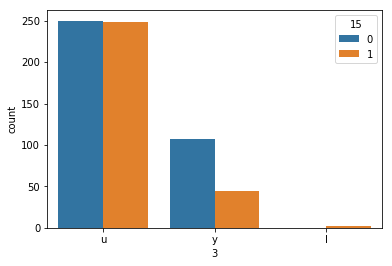

In [140]:
sns.countplot(df[3],data=df,hue=15)

In [151]:
cont_table_1 = pd.crosstab(df[15],df[3],margins=True)

In [152]:
cont_table_1

3,l,u,y,All
15,,,,
0,0,250,107,357
1,2,249,45,296
All,2,499,152,653


In [154]:
chi2, p, dof, expected = stats.chi2_contingency(cont_table_1)

In [155]:
p

0.0013253786890314136

## Chi test for series 8
1. Null - there isn't a relationship between pass/fail and how you scored on the t,f test
2. Alt - there is a relationship between pass/fail and how you scored on the t,f test

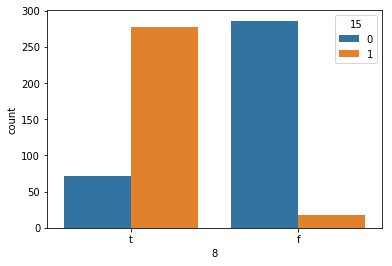

In [148]:
sns.countplot(df[8],data=df,hue=15)

In [156]:
cont_table_2 = pd.crosstab(df[15],df[8],margins=True)

In [159]:
cont_table_2

8,f,t,All
15,,,
0,286,71,357
1,18,278,296
All,304,349,653


In [157]:
chi2, p, dof, expected = stats.chi2_contingency(cont_table_2)

In [161]:
# oh baby, look at that p value

In [158]:
p

7.093483822571057e-76

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

### Q1

These t tests were assuming a 95% confidence level

#### part 1
Let's start with the first one. When looking at the difference between series 13 and the pass/fail series, I found that they were negatively correlated with each other. Meaning as the lower the score in 13 the higher likelyhood of passing. I wanted to dive into that relationship to see if there was a statistically significant difference between their means.

It turns out there was! Meaning we can reject the null and assume that populations who passed the credit score have a different average score on series 13 than the population who failed

#### part 2

When looking at the difference between series 10 and the pass/fail series, I found that they were positvely correlated with each other. Meaning as the higher the score in 10 the higher likelyhood of passing. I wanted to dive into that relationship to see if there was a statistically significant difference between their means.

Yet again, it turns out there was! Meaning we can reject the null and assume that populations who passed the credit score have a different average score on series 10 than the population who failed

### Q2

These chi-squared tests were assuming a 95% confidence level

#### part 1

For the catergorical series 3, I wanted to look and see if the relationship between a pass/fail is related to how they scored on this test. Looking at a countplot, it seemed as if there was some sort of relationship but I wanted to test with statistical significance. 

Well after running a chi-square test, we can say that there IS a relationship between pass/fail and how you scored on the u,y,l test.

#### part 2

Once again -- for the catergorical series 8, I wanted to look and see if the relationship between a pass/fail is related to how they scored on this test. Looking at a countplot, it seemed as if there was a relationship but I wanted to test with statistical significance. 

Well after running a chi-square test, we can say that there IS a relationship between pass/fail and how you scored on the t,f test. Just check out that low p-value!!



### Q3

The most challenging part is not knowing what these features values mean. All I can say is this test is related to whether they passed/failed. If we had information on the features, we could say things like "this population's income meets our t,f threshold therefore there is a relationship with pass/failing our credit test. Anyone can run a hypothesis test on variables, but having an understanding of what the data is saying is more important.